<a href="https://colab.research.google.com/github/vamsikrishna00466/time_series/blob/main/1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Necessary Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Raw data
df=pd.read_excel('/content/drive/MyDrive/SCA Projects/Forecasting /Raw Data for Forecasting Project.xlsx')

In [3]:
##Initial preprocessing(12-12-2021) work-Function
def data_preprocess1(df):
  df = df.drop(df.columns.to_series()["Unnamed: 6":"Receipt Details"], axis=1)
  df.columns = df.iloc[0]
  df = df[1:].reset_index(drop=bool)
  del df['Total']
  df = df.melt(id_vars=["Part No.", "Unit Price",'Category','Sales MOQ','Opening Stock'],
               var_name="Month",
               value_name="demand")
  df['Month']=pd.to_datetime(df['Month']).dt.to_period('M')
  df['Unit Price']=df['Unit Price'].astype('float')
  df['Sales MOQ']=df['Sales MOQ'].astype('float')
  df['Opening Stock']=df['Opening Stock'].astype('float')
  df['demand']=df['demand'].astype('float')
  return df

In [11]:
##Initial preprocessing raw data
df1 = data_preprocess1(df)

In [59]:
#removingg regular items
Regular = df1[df1['Category']=='Regular']
#dulpicates removing
Regular = Regular.groupby(by=['Month','Part No.']).agg({'demand':'first',
                                              'Opening Stock':'first',
                                              'Sales MOQ':'first',
                                              'Unit Price':'first',
                                              }).reset_index()

In [100]:
##converting categories into columns
Regular1 = Regular.pivot(index='Month', columns='Part No.', values='demand')

In [101]:
Regular1.shape

(48, 11139)

In [92]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df

In [103]:
Regular1 = missing_values(Regular1, 1)


In [111]:
Cor = Regular1.corr().abs()

In [113]:
s = Cor.unstack()
so = s.sort_values(kind="quicksort")

In [121]:
s1= s[s!=1]
s1[s1>0.99]

Part No.  Part No.
A0086     B0824       0.996455
A0780     B0987       0.997732
          D0324       0.998264
          G0988       0.998340
          H0027       0.994853
                        ...   
P0744     P0737       0.995277
          P0739       0.995767
          P0740       0.996099
          P0741       0.996099
          P0742       0.996424
Length: 124, dtype: float64

In [146]:
Z = Regular1[Regular1==0].count()
Z[Z<=0]

Part No.
H0871    0
N0403    0
dtype: int64

In [148]:
Regular1[['H0871','N0403']].corr()

Part No.,H0871,N0403
Part No.,,
H0871,1.000000,0.311012
N0403,0.311012,1.000000


In [150]:
Regular2 = Regular1[['H0871','N0403']]

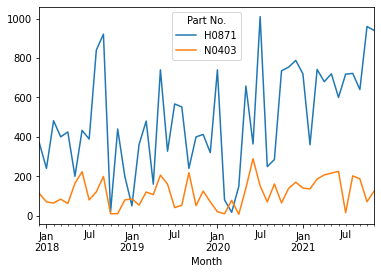

In [151]:
Regular2.plot()